In [1]:
import torch
from collections import namedtuple
from src.data import *
import matplotlib.pyplot as plt
import seaborn as sns

### Below is the implementation of the Kallus et al simulation

In [2]:
data = namedtuple("data","X T Y")
kallus_func = lambda X,U,T,eps: 1+T+X+2*T*X+0.5*X**2+0.75*T*X**2+U*X+0.5*eps

confounded_expectation_func = lambda X,T: 1+T+X+2*T*X+0.5*X**2+0.75*T*X**2+(T-0.5)*X**2
unconfounded_expectation_func = lambda X,T: 1+T+X+2*T*X+0.5*X**2+0.75*T*X**2

X_range = (-1,1)
n_samples_exp = 120
n_samples_obs = 1000
T_prop=0.5

In [3]:
obs_data = get_obs_sample_kallus(n_samples_obs,X_range=(-1,1),T_prop=T_prop,outcome_func = kallus_func)
exp_data = get_exp_sample_kallus(n_samples_exp,X_range=(-2,2),T_prop=T_prop,outcome_func = kallus_func)

pseudo_outcome = (exp_data.T - T_prop)/((T_prop)*(1-T_prop))*exp_data.Y  
pseudo_data = data(X=exp_data.X, T=exp_data.T,Y=pseudo_outcome)

T=exp_data.T
adjusted_outcome = exp_data.Y - confounded_expectation_func(exp_data.X,exp_data.T)  
adjusted_data = data(X=exp_data.X[T==0], T=exp_data.T[T==0],Y=adjusted_outcome[T==0])


Text(0.5, 1.0, 'Corrective function to be learned')

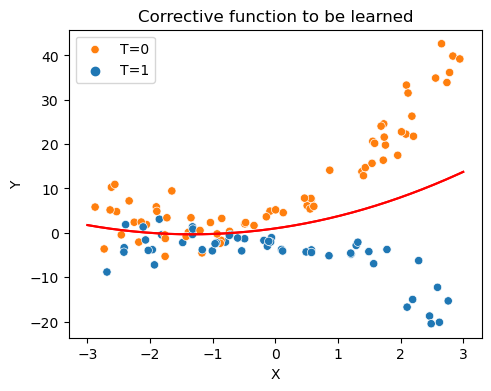

In [142]:
fig, axs = plt.subplots(ncols=1,sharex=True,figsize=(1/3*16,4),sharey=True)

# sns.scatterplot(x=obs_data.X,y=obs_data.Y,hue=obs_data.T,ax=axs[0])
# sns.scatterplot(x=exp_data.X,y=exp_data.Y,hue=exp_data.T,ax=axs[1])
sns.scatterplot(x=pseudo_data.X,y=pseudo_data.Y,hue=pseudo_data.T,ax=axs)

# axs[0].set_title("Observational Data")
# axs[1].set_title("Experimental Data")
# # axs[2].set_title("Pseudo Outcomes")
# col = ["blue","orange"]
axs.legend(labels=["T=0","T=1"])
# axs[1].legend(labels=["T=0","T=1"])

# for i in range(2):
#     for j in range(2):
#         leg = axs[i].get_legend()
#         leg.legendHandles[j].set_color(col[j])
#         axs[i].set_xlabel("X")
axs.set_ylabel("Y")
axs.set_xlabel("X")

# for i in range(2):
#     X_plot = torch.linspace(-3, 3, 1000)
#     Y_plot =confounded_expectation_func(X_plot,i) 
#     axs[2].plot(X_plot, Y_plot, color='r')
    # axs[0].plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=3,color=col[i])

for i in range(2):
    X_plot = torch.linspace(-3, 3, 1000)
    Y_plot = kallus_func(X_plot,0,1,0) - kallus_func(X_plot,0,0,0) 
    axs.plot(X_plot, Y_plot, color='r')
    # axs[1].plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=3,color=col[i])
axs.set_title("Corrective function to be learned")

In [86]:
diff_val = 0.13
a=1/6
spike_func = lambda X: 1/a*(-1.5-diff_val<X)*(X<-1.5+diff_val)*torch.exp(-(X+1.5)**2)

/var/folders/yr/5_cr5fgj6zj1hlf2c4zwzh9h0000gn/T/ipykernel_37974/358924015.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[j].set_color(col[j])
/var/folders/yr/5_cr5fgj6zj1hlf2c4zwzh9h0000gn/T/ipykernel_37974/358924015.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=3,color=col[i])
/var/folders/yr/5_cr5fgj6zj1hlf2c4zwzh9h0000gn/T/ipykernel_37974/358924015.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  axs.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=1,color="blue",linestyle = "dashdot")
/var/folders/yr/5_cr5fgj6zj1hlf2c4zwzh9h0000gn/T/i

Text(0.5, 1.0, 'Difference Due to Confounding')

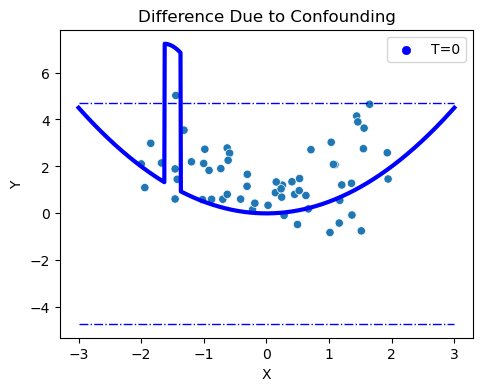

In [90]:
fig, axs = plt.subplots(ncols=1,sharex=True,figsize=(1/3*16,4),sharey=True)

sns.scatterplot(x=adjusted_data.X,y=adjusted_data.Y+1,hue=adjusted_data.T,ax=axs)
# sns.scatterplot(x=obs_data.X[obs_data.T==0],y=obs_data.Y[obs_data.T==0],hue=obs_data.T[obs_data.T==0],ax=axs[0])

axs.legend(labels=["T=0"])
# axs[0].legend(labels=["T=0"])

for j in range(1):
        leg = axs.get_legend()
        leg.legendHandles[j].set_color(col[j])
        axs.set_xlabel("X")
        axs.set_ylabel("Y")

for i in range(1):
    X_plot = torch.linspace(-3, 3, 1000)
    Y_plot = unconfounded_expectation_func(X_plot,i) - confounded_expectation_func(X_plot,i) + spike_func(X_plot)
    # axs[2].plot(X_plot, Y_plot, color='r')
    axs.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=3,color=col[i])

for i in range(2):
    X_plot = torch.linspace(-3, 3, 1000)
    Y_plot = (-1)**(i)*4.7*torch.ones_like(X_plot)
    # axs[2].plot(X_plot, Y_plot, color='r')
    axs.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=1,color="blue",linestyle = "dashdot")

# for i in range(2):
#     X_plot = torch.linspace(-3, 3, 1000)
#     Y_plot =confounded_expectation_func(X_plot,0) + (-1)**(i)*1.7*torch.ones_like(X_plot)
#     # axs[2].plot(X_plot, Y_plot, color='r')
#     axs[0].plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=1,color="blue",linestyle = "dashdot")

# X_plot = torch.linspace(-3, 3, 1000)
# Y_plot =confounded_expectation_func(X_plot,0)  
# # axs[2].plot(X_plot, Y_plot, color='r')
# axs[0].plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=1,color="blue")

axs.set_title("Difference Due to Confounding")

## We now implement GP bounds following https://github.com/aCapone1/gauss_proc_unknown_hyp

In [121]:
import gpytorch
from pyro.infer.mcmc import NUTS, MCMC
from gpytorch.priors import UniformPrior
import pyro


from src.GP_bounds import *

In [122]:
# set upper and lower bounds for uniform hyperprior
dimx = 1
ub = 1.1*torch.ones(3)
ub[0] = 1.1
ub[-1] = 1.1
lb = 0.9*torch.ones(3)
lb[-1] = 0.9
loglikelihood0 = [None]
training_iterations = 2000
num_samples = 20
warmup_steps = 20
sqrbeta0 = 2.14

hyperparam_dict = {
    "dimx":dimx,
    "ub":ub,
    "lb":lb,
    "loglikelihood0":loglikelihood0,
    "training_iterations":training_iterations,
    "num_samples":num_samples,
    "warmup_steps":warmup_steps,
    "sqrbeta0":sqrbeta0

}


In [123]:
obs_data = get_obs_sample_kallus(n_samples_obs,X_range=(-1,1),T_prop=T_prop,outcome_func = kallus_func)
exp_data = get_exp_sample_kallus(n_samples_exp,X_range=(-3,3),T_prop=T_prop,outcome_func = kallus_func)

pseudo_outcome = (exp_data.T - T_prop)/((T_prop)*(1-T_prop))*exp_data.Y  
pseudo_data = data(X=exp_data.X, T=exp_data.T,Y=pseudo_outcome)

T=exp_data.T

adjusted_outcome_new = exp_data.Y - confounded_expectation_func(exp_data.X,exp_data.T)  
adjusted_data_new = data(X=exp_data.X[T==0], T=exp_data.T[T==0],Y=adjusted_outcome_new[T==0])

In [124]:
# Below generates the true GP regression function



# Get into evaluation (predictive posterior) mode

train_x = adjusted_data_new.X
train_y = adjusted_data_new.Y

X_plot = torch.linspace(-3, 3, 1000)
Y_plot = unconfounded_expectation_func(X_plot,0) - confounded_expectation_func(X_plot,0)
# Y_sample = model(torch.concat([X_plot,train_x])).sample()
# Y__true_GP,train_y = Y_sample[:len(X_plot)], Y_sample[len(X_plot):]
# train_y = train_y +torch.randn_like(train_y)
# train_x = pseudo_data.X.detach()
# train_y = pseudo_data.Y.detach()


In [125]:
likelihood = gpytorch.likelihoods.GaussianLikelihood(
            noise_constraint=gpytorch.constraints.Interval(lb[-1], ub[-1]),
            noise_prior=UniformPrior(lb[-1], ub[-1]))
GP_bounds_model = BoundingGPModel(likelihood,hyperparam_dict)
GP_bounds_model.fit(train_x,train_y)
bounds,_,_ = GP_bounds_model.bound_output(X_plot)

Training Base Model
Training Bayes Model
Generating GP samples for fully Bayesian GP...


Sample: 100%|██████████| 40/40 [00:00, 45.91it/s, step size=1.03e+00, acc. prob=0.847]


/var/folders/yr/5_cr5fgj6zj1hlf2c4zwzh9h0000gn/T/ipykernel_37974/3314104400.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=4.0,color="blue")


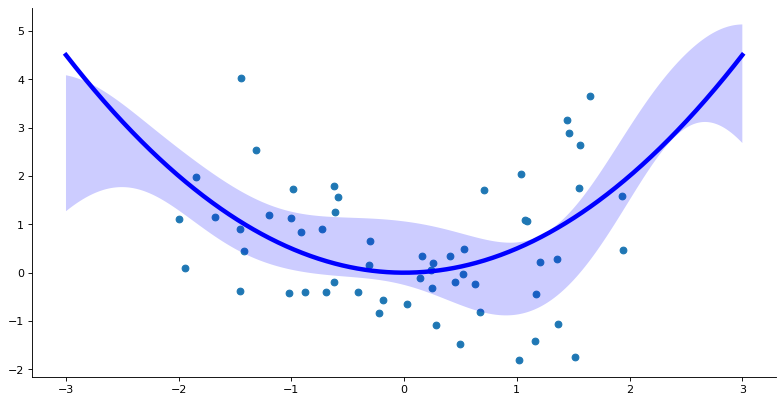

In [133]:
fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot()
ax.set_axisbelow(True)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(adjusted_data.X,adjusted_data.Y)

plt.plot(X_plot, Y_plot, 'k-', label=r'$f(x)$',linewidth=4.0,color="blue")
plt.fill(torch.cat([X_plot, torch.flip(X_plot,[0])]),
            bounds,
            alpha=.2, fc='b', ec='None', label= 'Our approach')

In [131]:
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Probabilistic bounds for the Causal Effect")

Text(0.5, 1.0, 'Probabilistic bounds for the Causal Effect')

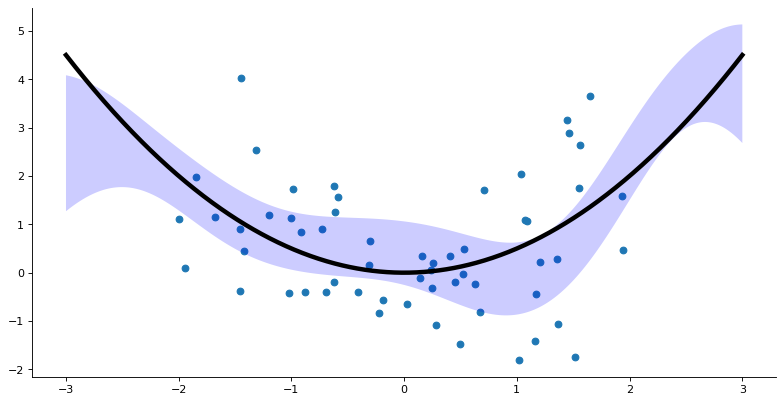

In [132]:
fig.get